In [19]:
import sys, os
def importOwnLib():
    if '/home/miruware/aProjects/lib' not in sys.path:
        sys.path.append('/home/miruware/aProjects/lib')
        print("lib path is successfully appended.")
    else:
        print("lib path is already exists.")

importOwnLib()
import sonyalib as sonya
import importlib
importlib.reload(sonya)

lib path is already exists.


<module 'sonyalib' from '/home/miruware/aProjects/lib/sonyalib.py'>

In [68]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True # GPU메모리가 전부 할당되지 않고, 아주 적은 비율만 할당되어 시작해서, 프로세스의 메모리 수요에 따라 증가하게 된다.

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
file_path0 = './BRC_input_201116_train.xlsx'
# me/tadata = sonya.get_normalized_metadata(file_path0)
metadata = sonya.get_original_metadata(file_path0)

In [85]:
properties = list(metadata.columns.values)
properties

['sex',
 'age',
 'LR',
 'cT',
 'cN',
 'cAverage',
 'cSD',
 'aAverage',
 'aSD',
 'lMax',
 'homogeneous',
 'hetero',
 'rim',
 'clustered',
 'non-mass',
 'AorCa',
 'LymAo',
 'LymCa',
 'label']

In [98]:
X_train = metadata[properties]
y_train = metadata[['label']]

In [109]:
X_train['homogeneous']

0      1.00
1      1.00
2      0.00
3      0.50
4      0.75
       ... 
191    0.75
192    1.00
193    1.00
194    0.75
195    0.00
Name: homogeneous, Length: 196, dtype: float64

In [110]:
scarler.fit_transform(X_train[['homogeneous']])

array([[ 0.958902  ],
       [ 0.958902  ],
       [-2.3675545 ],
       [-0.70432625],
       [ 0.12728788],
       [ 0.12728788],
       [ 0.12728788],
       [ 0.12728788],
       [ 0.958902  ],
       [-0.70432625],
       [ 0.12728788],
       [ 0.958902  ],
       [ 0.958902  ],
       [ 0.12728788],
       [-0.70432625],
       [ 0.12728788],
       [ 0.958902  ],
       [ 0.12728788],
       [ 0.12728788],
       [-0.70432625],
       [ 0.958902  ],
       [ 0.958902  ],
       [ 0.12728788],
       [ 0.958902  ],
       [ 0.12728788],
       [-2.3675545 ],
       [ 0.958902  ],
       [ 0.958902  ],
       [-2.3675545 ],
       [ 0.12728788],
       [ 0.12728788],
       [ 0.958902  ],
       [ 0.12728788],
       [ 0.12728788],
       [-0.70432625],
       [ 0.958902  ],
       [-2.3675545 ],
       [ 0.12728788],
       [ 0.12728788],
       [-2.3675545 ],
       [-2.3675545 ],
       [ 0.958902  ],
       [ 0.12728788],
       [ 0.958902  ],
       [ 0.12728788],
       [ 0

In [88]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 2019)

In [93]:
X_train.shape, y_train.shape

((426, 30), (426,))

In [94]:
X_train_scarler = scarler.fit_transform(X_train)

In [95]:
X_train_scarler.shape

(426, 30)

In [96]:
X_train[0]

array([1.203e+01, 1.793e+01, 7.609e+01, 4.460e+02, 7.683e-02, 3.892e-02,
       1.546e-03, 5.592e-03, 1.382e-01, 6.070e-02, 2.335e-01, 9.097e-01,
       1.466e+00, 1.697e+01, 4.729e-03, 6.887e-03, 1.184e-03, 3.951e-03,
       1.466e-02, 1.755e-03, 1.307e+01, 2.225e+01, 8.274e+01, 5.234e+02,
       1.013e-01, 7.390e-02, 7.732e-03, 2.796e-02, 2.171e-01, 7.037e-02])

In [97]:
X_train_scarler[0]

array([-0.60495566, -0.33496918, -0.66207953, -0.59839094, -1.41656802,
       -1.25049386, -1.10271669, -1.11402   , -1.57901211, -0.28372514,
       -0.61122521, -0.54103822, -0.68666236, -0.49489791, -0.75794299,
       -1.07787311, -1.04261955, -1.29784029, -0.71840319, -0.73669523,
       -0.67271146, -0.57856961, -0.73993876, -0.6347733 , -1.35163648,
       -1.16976403, -1.29843533, -1.32233761, -1.21766292, -0.7576985 ])

In [5]:
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.backend.tensorflow_backend import set_session
from keras.losses import binary_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit


# ==================================================



config = tf.ConfigProto()
config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))



def create_model(num_input=1, dropout=0, learning_rate=0.005, neurons1=9, neurons2=9):
    global num_features
    keras.backend.clear_session()

    ## 모델 구성하기
    model = Sequential()

    model.add(Dense(neurons1, activation='relu', input_dim=num_features, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dense(neurons2, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

    ## 모델 컴파일
    model.compile(optimizer=Adam(learning_rate), loss=binary_crossentropy, metrics=['accuracy'])

    # model.summary()

    return model

In [6]:
# fit random seed for reproductivity
seed = 7
np.random.seed(seed)

# Load metadata

file_path0 = './BRC_input_201116_train.xlsx'
metadata = sonya.get_normalized_metadata(file_path0)

properties = list(metadata.columns.values)
# properties.remove('label')
# X = metadata[properties]
# y = metadata['label']

# X = metadata[[
#     'sex',
#     'age',
#     'LR',
#     'cT',
#     'cN',
#     'cAverage',
#     'cSD',
#     'aAverage',
#     'aSD',
#     'lMax',
#     'homogeneous',
#     'hetero',
#     'rim',
#     'clustered',
#     'non-mass',
#     'AorCa',
#     'LymAo',
#     'LymCa'
# ]]
#
# y = metadata['label']

input_X = metadata[[
    'sex',
    'age',
    'LR',
    'cT',
    'cN',
    'cAverage',
    'cSD',
    'aAverage',
    'aSD',
    'lMax',
    'homogeneous',
    'hetero',
    'rim',
    'clustered',
    'non-mass',
    'AorCa',
    'LymAo',
    'LymCa',
    'label'
]]

In [58]:
import pandas as pd
path = './BRC_input_201116.xlsx'
excel_file = pd.read_excel(path, sheet_name='BRC_metastasis_input', dtype={u'ID':str, u'익명 검사번호': str})

In [68]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_idx, test_idx in split.split(excel_file, excel_file['pN_modify']):
    input_train = excel_file.loc[train_idx]
    input_test = excel_file.loc[test_idx]

In [73]:
input_train.to_excel("./BRC_input_201116_train.xlsx", sheet_name='BRC_metastasis_input')

In [74]:
input_test.to_excel("./BRC_input_201116_test.xlsx", sheet_name='BRC_metastasis_input')

In [60]:
label_negative = [n for n, nLabel in enumerate(excel_file['pN_modify']) if int(nLabel) is 0]
label_positive = [n for n, nLabel in enumerate(excel_file['pN_modify']) if int(nLabel) is 1]

In [66]:
excel_file.iloc[label_negative]

,sex,age,LR,cT,enhancement,cN,cN_modify,cAverage,cSD,aAverage,aSD,lMax,pN_modify,Unnamed: 13,익명 검사번호,ID
3,F,56,R,9,moderate,suspicious,suspicious,70.4,5.9,185.1,6.9,109.0,0,NaN,000000193080,0130990
7,F,40,L,80,non-enhancement,probable,positive,57.7,6.3,220.1,6.4,117.0,0,NaN,000000193085,0130995
8,F,31,L,9,weak,suspicious,suspicious,79.8,6.2,181.5,6.9,137.0,0,NaN,000000193089,0130999
9,F,53,R,40,non-mass,suspicious,suspicious,77.6,16.2,154.1,7.6,106.0,0,NaN,000000193090,0131000
12,F,38,R,30,non-mass,suspicious,suspicious,85.7,8.1,183.6,8.7,83.0,0,NaN,000000193093,0131003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,F,49,L,13,high,suspicious,suspicious,114.8,14.1,167.3,9.8,108.0,0,NaN,000000172018,0119176
264,F,46,L,30,non-mass,suspicious,suspicious,101.7,15.9,198.5,7.6,108.0,0,NaN,000000193819,0131695
268,F,44,L,11,high,possible,positive,89.7,30.2,189.8,8.3,136.0,0,NaN,000000193833,0131708
271,F,46,R,38,high,suspicious,suspicious,105.0,8.1,160.6,6.8,113.0,0,NaN,000000172034,0119191


In [65]:
excel_file.iloc[label_positive]


,sex,age,LR,cT,enhancement,cN,cN_modify,cAverage,cSD,aAverage,aSD,lMax,pN_modify,Unnamed: 13,익명 검사번호,ID
0,F,79,L,16,high,negative,negative,79.9,17.9,207.7,7.7,110.0,1,NaN,000000193073,0130983
1,F,59,R,11,high,negative,negative,121.5,12.2,178.2,9.8,73.0,1,NaN,000000193074,0130984
2,F,64,R,15,high,negative,negative,87.4,10.3,184.2,6.0,96.0,1,NaN,000000193075,0130985
4,F,55,L,15,weak,suspicious,suspicious,78.1,9.8,166.0,5.5,107.0,1,NaN,000000173145,0119330
5,F,61,L,17,moderate,negative,negative,97.3,13.9,202.4,10.0,110.0,1,NaN,000000173165,0119347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,F,55,L,13,high,negative,negative,78.2,7.1,156.8,3.8,78.0,1,NaN,000000193858,0131732
276,F,56,L,7,moderate,probable,positive,64.5,10.7,155.8,9.7,115.0,1,NaN,000000193865,0131739
277,F,37,R,11,moderate,negative,negative,89.2,11.3,156.1,5.0,150.0,1,NaN,000000193870,0131744
278,F,69,L,18,high,suspicious,suspicious,94.2,10.0,177.2,8.4,96.0,1,NaN,000000193873,0131747


In [63]:
input_X.iloc[label_positive]

,sex,age,LR,cT,cN,cAverage,cSD,aAverage,aSD,lMax,homogeneous,hetero,rim,clustered,non-mass,AorCa,LymAo,LymCa,label
0,1,79,1,0.2000,0.00,0.387231,0.442197,0.526992,0.282759,0.333333,1.00,0,0,0,0,0.611257,0.619089,0.466627,1
1,1,59,0,0.1375,0.00,0.675920,0.277457,0.337404,0.427586,0.127778,1.00,0,0,0,0,0.237244,0.651333,0.939266,1
2,1,64,0,0.1875,0.00,0.439278,0.222543,0.375964,0.165517,0.255556,1.00,0,0,0,0,0.448185,0.578246,0.595911,1
4,1,55,1,0.1875,0.25,0.374740,0.208092,0.258997,0.131034,0.316667,0.50,0,0,0,0,0.401368,0.452709,0.473842,1
5,1,61,1,0.2125,0.00,0.507981,0.326590,0.492931,0.441379,0.333333,0.75,0,0,0,0,0.491846,0.596303,0.571257,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1,55,1,0.1625,0.00,0.375434,0.130058,0.199871,0.013793,0.155556,1.00,0,0,0,0,0.352446,0.537833,0.648827,1
276,1,56,1,0.0875,0.75,0.280361,0.234104,0.193445,0.420690,0.361111,0.75,0,0,0,0,0.419253,0.374463,0.343957,1
277,1,37,0,0.1375,0.00,0.451770,0.251445,0.195373,0.096552,0.555556,0.75,0,0,0,0,0.290900,0.225279,0.282020,1
278,1,69,1,0.2250,0.25,0.486468,0.213873,0.330977,0.331034,0.255556,1.00,0,0,0,0,0.375592,0.548151,0.636801,1


In [45]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_idx, test_idx in split.split(input_X, input_X['label']):
    input_train = input_X.loc[train_idx]
    input_test = input_X.loc[test_idx]


196
196


In [55]:
input_train.to_excel("./BRC_input_201116_train.xlsx")

In [47]:
input_train
train_negative = [n for n, nLabel in enumerate(input_train['label']) if int(nLabel) is 0]
train_positive = [n for n, nLabel in enumerate(input_train['label']) if int(nLabel) is 1]

In [53]:
len(input_train.iloc[train_negative]), len(input_train.iloc[train_positive])

(59, 137)

In [54]:
test_negative = [n for n, nLabel in enumerate(input_test['label']) if int(nLabel) is 0]
test_positive = [n for n, nLabel in enumerate(input_test['label']) if int(nLabel) is 1]
print(len(input_test.iloc[test_negative]), len(input_test.iloc[test_positive]))

25 59


In [3]:
# seperate dataset to train data & test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(input_X['label'] == 0))
print(len(input_X['label'] == 1))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_idx, test_idx in split.split(input_X, input_X['label']):
    input_train = input_X.loc[train_idx]
    input_test = input_X.loc[test_idx]

print(len(input_train['label'] == 0))
print(len(input_train['label'] == 1))



#
# for i in range(len(X.columns)):
#     print(i)
#


# # create model
# # model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=batch_size)
# model = KerasClassifier(build_fn=create_model)
#
# batch = [10, 20, 30, 40]
# epochs = [10, 50, 100]
# lr = [0.001, 0.005, 0.01, 0.05]
# neurons1 = [3, 5, 7, 9, 11]
# neurons2 = [3, 5, 7, 9, 11]
#
# grid = dict(
#     neurons1=neurons1,
#     neurons2=neurons2,
#     batch_size=batch,
#     learning_rate=lr
# )
#
# grid = GridSearchCV(estimator=model, param_grid=grid, cv=10)
# grid_result = grid.fit(X_train, y_train) # 최적의 hyperparameters를 찾는데 testset을 사용하지 않았다.
#
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))
#
#


IndentationError: unexpected indent (<ipython-input-3-4255a2703f8c>, line 3)

In [1]:
from sklearn.preprocessing import StandardScaler

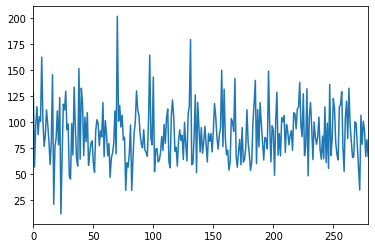

In [13]:
metadata['AorCa'].plot()

In [45]:
scarler = StandardScaler()

In [15]:
result = scarler.fit_transform(metadata[['AorCa']])

In [51]:
import matplotlib.pyplot as plt

(array([ 2.,  8., 59., 81., 72., 33., 17.,  5.,  2.,  1.]),
 array([-2.91647718, -2.1948852 , -1.47329322, -0.75170124, -0.03010926,
         0.69148272,  1.4130747 ,  2.13466668,  2.85625866,  3.57785064,
         4.29944262]),
 <a list of 10 Patch objects>)

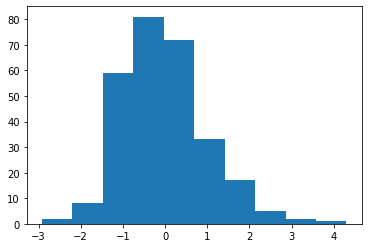

In [17]:
plt.hist(result)

(array([ 2.,  8., 59., 81., 72., 33., 17.,  5.,  2.,  1.]),
 array([ 11.6 ,  30.61,  49.62,  68.63,  87.64, 106.65, 125.66, 144.67,
        163.68, 182.69, 201.7 ]),
 <a list of 10 Patch objects>)

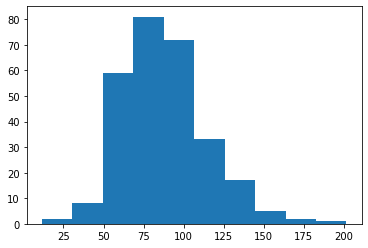

In [18]:
plt.hist(metadata['AorCa'])

In [39]:
meta = sonya.get_original_metadata(file_path0)

In [40]:
meta

,sex,age,LR,cT,cN,cAverage,cSD,aAverage,aSD,lMax,homogeneous,hetero,rim,clustered,non-mass,AorCa,LymAo,LymCa,label
0,1,61,1,23.0,0.00,73.7,11.1,177.2,8.5,125.0,1.00,0,0,0,0,103.5,52.2,-51.3,1
1,1,70,0,13.0,0.25,65.8,12.0,164.4,10.4,112.0,1.00,0,0,0,0,98.6,52.4,-46.2,1
2,1,23,1,40.0,0.25,91.4,13.3,210.2,7.4,156.0,0.00,0,0,0,1,118.8,54.2,-64.6,0
3,1,44,1,18.0,0.75,106.4,13.7,158.0,11.2,126.0,0.50,0,0,0,0,51.6,32.0,-19.6,0
4,1,47,0,12.0,0.00,109.2,10.8,176.0,9.2,101.0,0.75,0,0,0,0,66.8,75.0,8.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,1,35,0,15.0,0.25,85.1,11.0,148.3,8.6,91.0,0.75,0,0,0,0,63.2,57.3,-5.9,1
192,1,63,0,25.0,0.00,102.9,10.0,181.5,8.5,101.0,1.00,0,0,0,0,78.6,80.5,1.9,1
193,1,55,1,13.0,0.25,100.9,8.6,207.1,8.8,124.0,1.00,0,0,0,0,106.2,83.1,-23.1,0
194,1,70,0,16.0,0.50,65.0,10.0,183.8,6.4,134.0,0.75,0,0,0,0,118.8,49.8,-69.0,1


In [41]:
properties = list(meta.columns.values)